# Implement, train and predict using 
1. Linear Regression
2. Decision Tree Regression
3. Random ForestRegression
4. Support Vector Regression
5. Neural Network Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Import the data

In [2]:
training_data=pd.read_csv('./data/Met_train.csv',sep=',',parse_dates=['date'])
training_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog


In [3]:
training_data['day_of_week'] = training_data['date'].dt.dayofweek
training_data['week_day'] = training_data['date'].dt.weekday_name
training_data['events_code'] = pd.Categorical(training_data["events"]).codes
y=training_data["request_count"]
training_data = training_data.drop(["date","events","request_count","week_day"],axis=1)
training_data= pd.get_dummies(training_data,columns=["calendar_code","events_code","day_of_week"],prefix=["calendar","event","week"])
training_data.head()
X=training_data.values

# Split the data into training and test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state = 0)

# Linear Regression

In [5]:
#Training the model
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
#Make predictions on the training and test sets
LR_prediction_train=lr.predict(X_train)
LR_prediction_test=lr.predict(X_test)

2236.26046627 3449.85105633


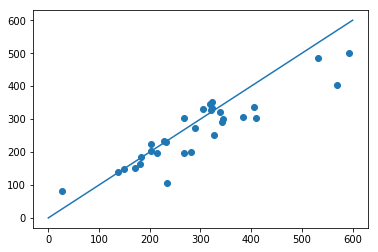

In [7]:
#Report the errors in prediction on the train and the test set
LR_MRS_train=mean_squared_error(LR_prediction_train,y_train)
LR_MRS_test=mean_squared_error(LR_prediction_test,y_test)
plt.scatter(y_test,LR_prediction_test)
plt.plot([0,600],[0,600])
print(LR_MRS_train,LR_MRS_test)

In [8]:
#Have a look at the trained coefficients
print("Print the coefficients ",lr.coef_)
print("Print the intercept", lr.intercept_)

Print the coefficients  [  18.40938231   -3.9513145     1.753334      0.36049394  -46.30586012
   46.30586012   -5.77753735   18.54382423 -204.65991761   25.17353363
   -2.05217264   24.09439484   38.00864736   65.20241231   41.46681522
  -32.89965338  -43.22231904  -20.26751751  -28.98831211   40.52919175
   47.74470669   37.10390361]
Print the intercept 68.9396853647


# Decision Tree

In [9]:
#Training the model
from sklearn import tree
dt = tree.DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [10]:
#Make predictions on the training and test sets
DT_prediction_test = dt.predict(X_test)
DT_prediction_train = dt.predict(X_train)

0.0 9375.12903226


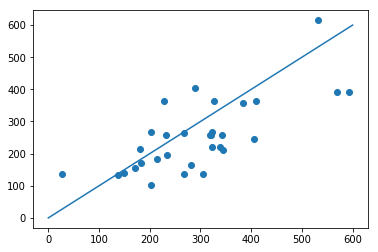

In [11]:
#Report the errors in prediction on the train and the test set
DT_MRS_train=mean_squared_error(DT_prediction_train,y_train)
DT_MRS_test=mean_squared_error(DT_prediction_test,y_test)
plt.scatter(y_test,DT_prediction_test)
plt.plot([0,600],[0,600])
print(DT_MRS_train,DT_MRS_test)

# Random Forest

In [12]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
#Make predictions on the training and test sets
RF_prediction_test = rf.predict(X_test)
RF_prediction_train = rf.predict(X_train)

848.331487603 6543.2716129


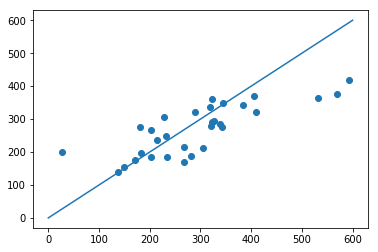

In [14]:
#Report the errors in prediction on the train and the test set
RF_MRS_train=mean_squared_error(RF_prediction_train,y_train)
RF_MRS_test=mean_squared_error(RF_prediction_test,y_test)
plt.scatter(y_test,RF_prediction_test)
plt.plot([0,600],[0,600])
print(RF_MRS_train,RF_MRS_test)

# Support Vector Machine

In [18]:
#Training the model
from sklearn.svm import SVR
svm=SVR(C=100, degree=3, kernel='linear',gamma=0.1)
svm.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
#Make predictions on the training and test sets
SVR_prediction_test = svm.predict(X_test)
SVR_prediction_train = svm.predict(X_train)

2632.78441285 4572.45890096


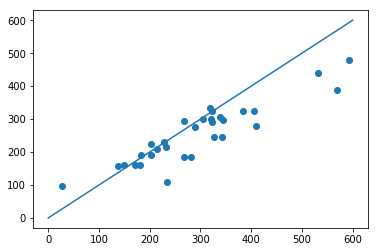

In [20]:
#Report the errors in prediction on the train and the test set
SVR_MRS_train=mean_squared_error(SVR_prediction_train,y_train)
SVR_MRS_test=mean_squared_error(SVR_prediction_test,y_test)
plt.scatter(y_test,SVR_prediction_test)
plt.plot([0,600],[0,600])
print(SVR_MRS_train,SVR_MRS_test)

# Neural Network Architecture

In [21]:
# Make a neural network architecture
import keras
from keras.models import Sequential
from keras.layers import Dense

m,input_layer_size=X.shape
NN_reg = Sequential()
NN_reg.add(Dense(input_dim = input_layer_size, units = 10, activation = 'relu'))
NN_reg.add(Dense(input_dim = input_layer_size, units = 5, activation = 'relu'))
NN_reg.add(Dense(units = 10, activation = 'relu'))
NN_reg.add(Dense(units = 1))
NN_reg.compile(loss='mean_squared_error', optimizer='adam')

Using TensorFlow backend.


# Train and fit a neural network

In [22]:
#Training the model
NN_reg.fit(X_train, y_train, batch_size = 150, epochs = 400,verbose=0)

In [23]:
#Make predictions on the training and test sets
NN_prediction_test = NN_reg.predict(X_test)
NN_prediction_train = NN_reg.predict(X_train)

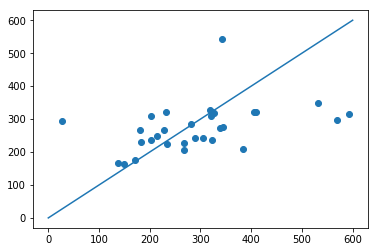

In [24]:
#Report the errors in prediction on the train and the test set
NN_MRS_train=mean_squared_error(NN_prediction_train,y_train)
NN_MRS_test=mean_squared_error(NN_prediction_test,y_test)
plt.scatter(y_test,NN_prediction_test)
plt.plot([0,600],[0,600])

# Make intercomparisions

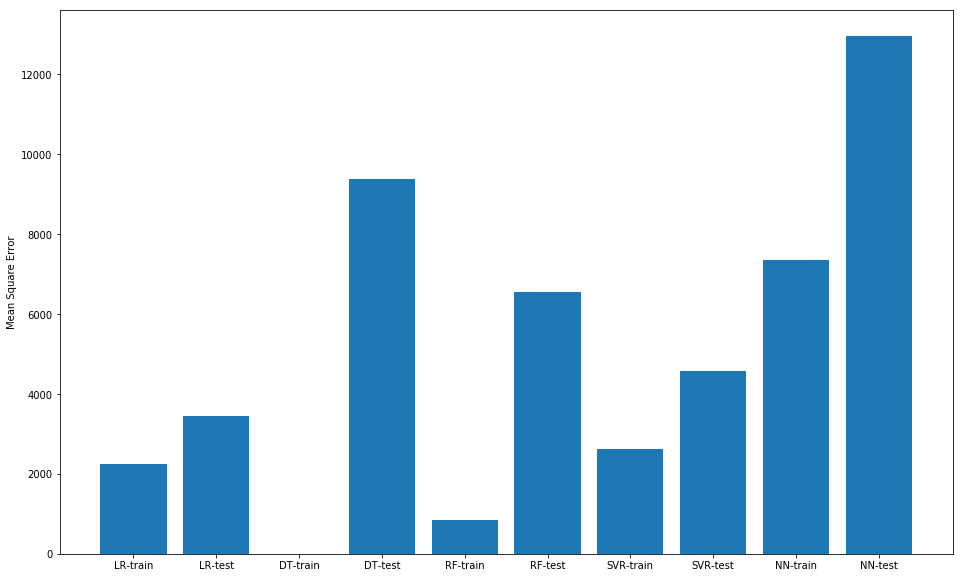

In [25]:
fig=plt.figure(figsize=(16,10))
myplt = [LR_MRS_train, LR_MRS_test,DT_MRS_train, DT_MRS_test, RF_MRS_train, RF_MRS_test, SVR_MRS_train ,SVR_MRS_test, NN_MRS_train, NN_MRS_test]
plt.bar(range(len(myplt)), myplt)
plt.xticks(range(len(myplt)), ('LR-train', 'LR-test','DT-train','DT-test', 'RF-train' , 'RF-test', 'SVR-train','SVR-test','NN-train','NN-test'))
plt.ylabel('Mean Square Error')

# Try hyperparameter tuning to reduce the error on the test data